# <span style="color:blue"> Projeto 01 - Concessão de cartões de crédito </span>



Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|





In [114]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [115]:
df = pd.read_csv('demo01.csv')
print ("Número de linhas e colunas da tabela: {}".format(df.shape))

df.head()

Número de linhas e colunas da tabela: (16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [116]:
print(df['mau'].value_counts())
print("\nTaxa de inadimplentes:")
print(df['mau'].mean())
print('Em porcentagem ficaria {:.2%}'.format(df['mau'].mean()))

False    16260
True       390
Name: mau, dtype: int64

Taxa de inadimplentes:
0.023423423423423424
Em porcentagem ficaria 2.34%


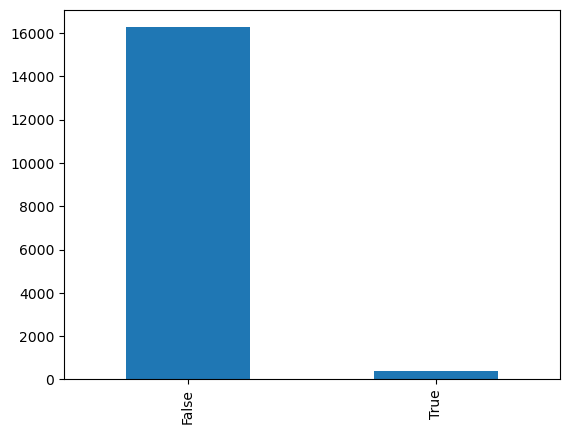

In [117]:
grafico_barras = df['mau'].value_counts().plot.bar()

<Figure size 640x480 with 0 Axes>

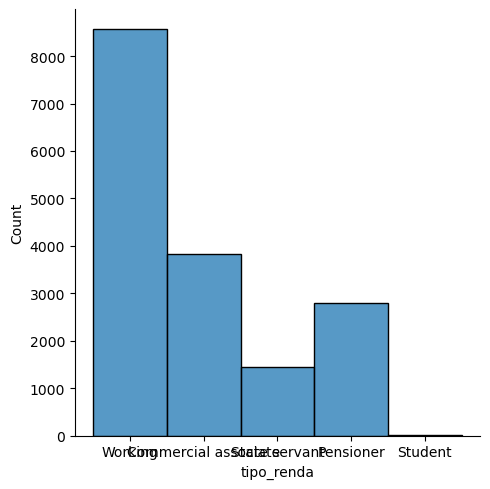

In [118]:
plt.clf()

sns.displot(df, x = 'tipo_renda', bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

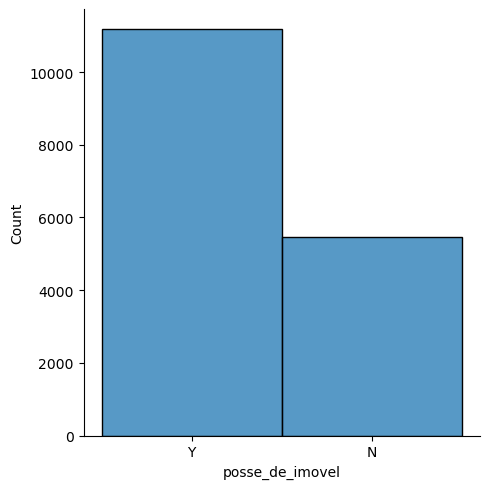

In [119]:
plt.clf()

sns.displot(df, x = 'posse_de_imovel', bins = 50)
plt.show()

In [120]:
df.loc[df["tempo_emprego"]<0,"tempo_emprego"] = -2

<Figure size 640x480 with 0 Axes>

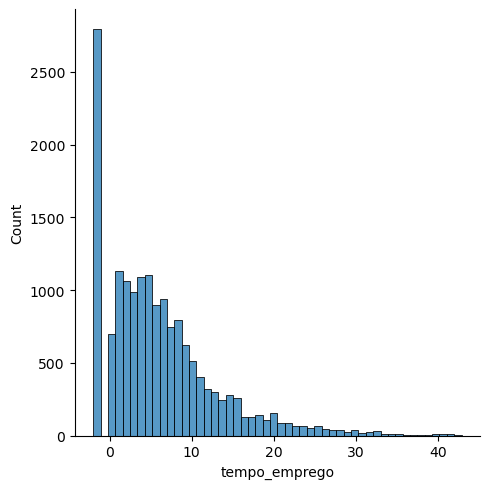

In [121]:
plt.clf()

sns.displot(df, x = "tempo_emprego", bins = 50)
plt.show()

### Entendimento dos dados - Bivariadas

Entender a alteração da inadimplência indicada pela variável resposta (```AtrasoRelevante2anos```) e as variáveis explicativas (demais). Para isto, vamos calcular a taxa de inadimplentes (qtd inadimplentes / total) para diferentes grupos definidos pelas variáveis explicativas.


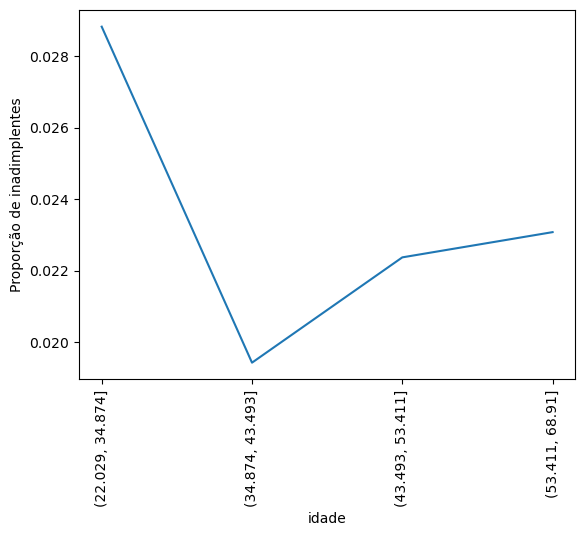

In [122]:
var = 'idade'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

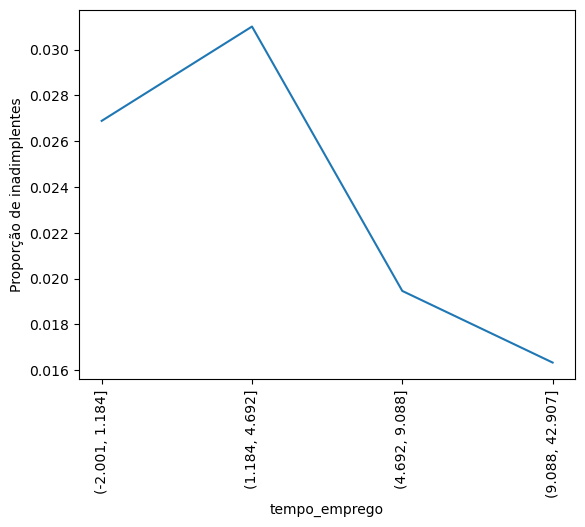

In [123]:
var = 'tempo_emprego'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

Existe uma certa relação entre a  faixa etária e o tempo no emprego , pois de acordo com os graficos percebe-se que a faixa de idade entre 22 e 34 anos em conjunto com o tempo de emprego menor ou igual a 14 meses tem um risco muito maior na questão de inadimplência.

In [124]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
    
metadata

,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


In [125]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [126]:
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [127]:
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,0,...,0,1,0,0,0,0,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,0,...,0,0,0,0,0,0,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,0,0,0,0,0,0,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,0,0,0,0,0,0,0,0,0,0


In [128]:
x = df.drop("mau",axis = 1)
y = df["mau"]

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [129]:
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
7121,1,31.186301,2.128767,1,1,0,0,3.0,1,1,...,0,0,0,0,0,0,0,0,0,0
4918,0,60.394521,-2.000000,1,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13625,0,50.632877,4.931507,1,0,0,0,1.0,1,1,...,0,0,0,0,1,0,0,0,0,0
10720,1,28.800000,1.432877,1,0,0,0,3.0,1,0,...,0,0,0,0,0,0,0,0,0,0
16418,1,29.646575,7.800000,1,0,0,0,3.0,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10604,0,27.035616,3.345205,1,1,1,0,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2899,0,45.715068,1.641096,1,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
15207,0,43.616438,18.797260,1,1,1,0,2.0,0,0,...,0,1,0,0,0,0,0,0,0,0
11823,2,38.794521,1.156164,1,0,1,1,3.0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [165]:
clf = RandomForestClassifier(n_estimators=3)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3)

In [166]:
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.21%


In [167]:
# Matriz de confusão

tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab.iloc[1,0]/(tab.iloc[1,0] + tab.iloc[0,0]))
print(tab.iloc[1,1]/(tab.iloc[1,1] + tab.iloc[0,1]))
tab

0.007137583066699483
0.13


mau,False,True
row_0,,
False,4034,87
True,29,13


In [170]:
clf = RandomForestClassifier(n_estimators=8)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=8)

In [171]:
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {:.2%}'.format(acc))

Acurácia: 97.45%


In [172]:
tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab.iloc[1,0]/(tab.iloc[1,0] + tab.iloc[0,0]))
print(tab.iloc[1,1]/(tab.iloc[1,1] + tab.iloc[0,1]))
tab

0.004430223972434162
0.12


mau,False,True
row_0,,
False,4045,88
True,18,12


In [158]:
# Treinar uma Random Forest com 5 árvores

clf = RandomForestClassifier(n_estimators=10)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [159]:
# Calculando a acuracia

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.29%


In [164]:
# Matriz de confusão

tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab.iloc[1,0]/(tab.iloc[1,0] + tab.iloc[0,0]))
print(tab.iloc[1,1]/(tab.iloc[1,1] + tab.iloc[0,1]))
tab

0.006399212404627123
0.13


mau,False,True
row_0,,
False,4037,87
True,26,13
